# Data Analysis on South Korea's Total Fertility Rate (TFR)

## 1. Population Pyramid 

### 2008:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_male = pd.read_excel('200812_200812_연령별인구현황_연간.xlsx', skiprows=3, index_col='행정기관', usecols='B,E:Y', nrows=1)
df_male

C:\Users\yunhu\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"1,183,217","1,464,571","1,803,423","1,804,831","1,648,863","2,079,081","1,994,183","2,326,763","2,183,128","2,227,093",...,"1,249,093","989,786","879,481","606,143","319,313","151,538","64,836","14,862","2,731",255


In [3]:
# renaming column names
headerNames = ['0~4', '5~9', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85~89', '90~94', '95~99', 'Above 100']
df_male.columns = headerNames
df_male

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"1,183,217","1,464,571","1,803,423","1,804,831","1,648,863","2,079,081","1,994,183","2,326,763","2,183,128","2,227,093",...,"1,249,093","989,786","879,481","606,143","319,313","151,538","64,836","14,862","2,731",255


In [4]:
 # converting str -> int
df_male_temp1 = df_male.iloc[0:1, 0:-1]
df_male_temp1.iloc[0] = df_male_temp1.iloc[0].str.replace(',', '').astype(int)

In [5]:
# combining two data frames
df_male_temp2 = df_male.iloc[0:1, -1:]
df_male = pd.concat([df_male_temp1,df_male_temp2], axis=1, join='inner')

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,1183217,1464571,1803423,1804831,1648863,2079081,1994183,2326763,2183128,2227093,...,1249093,989786,879481,606143,319313,151538,64836,14862,2731,255


In [6]:
df_female = pd.read_excel('200812_200812_연령별인구현황_연간.xlsx', skiprows=3, index_col='행정기관', usecols='B,AB:AV', nrows=1)
df_female

C:\Users\yunhu\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"1,106,841","1,342,234","1,618,701","1,597,967","1,515,272","1,982,422","1,910,584","2,238,764","2,105,474","2,156,153",...,"1,266,290","1,051,170","1,044,359","834,434","573,152","338,154","171,636","54,262","12,037","2,080"


In [7]:
 # To have the same column names
df_female.columns = df_male.columns

In [8]:
# converting str -> int
df_female.iloc[0] = df_female.iloc[0].str.replace(',', '').astype(int)
df_female

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,1106841,1342234,1618701,1597967,1515272,1982422,1910584,2238764,2105474,2156153,...,1266290,1051170,1044359,834434,573152,338154,171636,54262,12037,2080


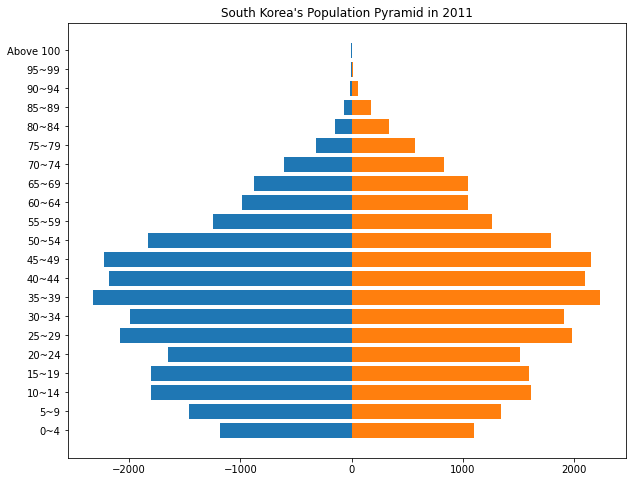

In [9]:
plt.figure(figsize=(10, 8))
plt.barh(df_male.columns, -df_male.iloc[0] // 1000)
plt.barh(df_female.columns, df_female.iloc[0] // 1000)
plt.title("South Korea's Population Pyramid in 2011")
plt.show()

### 2022:

In [10]:
df_male = pd.read_excel('202201_202201_연령별인구현황_월간.xlsx', skiprows=3, index_col='행정기관', usecols='B,E:Y', nrows=1)
df_male

C:\Users\yunhu\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"778,266","1,137,135","1,216,746","1,212,320","1,616,561","1,862,891","1,679,387","1,784,229","2,035,381","2,114,019",...,"2,082,375","2,053,427","1,472,075","992,362","697,893","463,734","198,740","50,759","9,148","1,423"


In [11]:
# renaming column names
df_male.columns = ['0 ~ 4', '5 ~ 9', '10 ~ 14', '15 ~ 19', '20 ~ 24', '25 ~ 29', '30 ~ 34', '35 ~ 39', '40 ~ 44', '45 ~ 49', '50 ~ 54', '55 ~ 59', '60 ~ 64', '65 ~ 69', '70 ~ 74', '75 ~ 79', '80 ~ 84', '85 ~ 89', '90 ~ 94', '95 ~ 99', 'Above 100']
df_male

,0 ~ 4,5 ~ 9,10 ~ 14,15 ~ 19,20 ~ 24,25 ~ 29,30 ~ 34,35 ~ 39,40 ~ 44,45 ~ 49,...,55 ~ 59,60 ~ 64,65 ~ 69,70 ~ 74,75 ~ 79,80 ~ 84,85 ~ 89,90 ~ 94,95 ~ 99,Above 100
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"778,266","1,137,135","1,216,746","1,212,320","1,616,561","1,862,891","1,679,387","1,784,229","2,035,381","2,114,019",...,"2,082,375","2,053,427","1,472,075","992,362","697,893","463,734","198,740","50,759","9,148","1,423"


In [12]:
# converting str -> int
df_male.iloc[0] = df_male.iloc[0].str.replace(',', '').astype(int)
df_male

,0 ~ 4,5 ~ 9,10 ~ 14,15 ~ 19,20 ~ 24,25 ~ 29,30 ~ 34,35 ~ 39,40 ~ 44,45 ~ 49,...,55 ~ 59,60 ~ 64,65 ~ 69,70 ~ 74,75 ~ 79,80 ~ 84,85 ~ 89,90 ~ 94,95 ~ 99,Above 100
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,778266,1137135,1216746,1212320,1616561,1862891,1679387,1784229,2035381,2114019,...,2082375,2053427,1472075,992362,697893,463734,198740,50759,9148,1423


In [13]:
df_female = pd.read_excel('202201_202201_연령별인구현황_월간.xlsx', skiprows=3, index_col='행정기관', usecols='B,AB:AV', nrows=1)
df_female

C:\Users\yunhu\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"738,470","1,082,771","1,149,152","1,127,784","1,490,117","1,663,142","1,541,734","1,698,921","1,967,541","2,049,882",...,"2,019,257","2,096,880","1,573,921","1,127,047","907,592","749,407","441,143","169,780","38,908","6,730"


In [14]:
# To have the same column names
df_female.columns = df_male.columns

In [15]:
# converting str -> int
df_female.iloc[0] = df_female.iloc[0].str.replace(',', '').astype(int)
df_female

,0 ~ 4,5 ~ 9,10 ~ 14,15 ~ 19,20 ~ 24,25 ~ 29,30 ~ 34,35 ~ 39,40 ~ 44,45 ~ 49,...,55 ~ 59,60 ~ 64,65 ~ 69,70 ~ 74,75 ~ 79,80 ~ 84,85 ~ 89,90 ~ 94,95 ~ 99,Above 100
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,738470,1082771,1149152,1127784,1490117,1663142,1541734,1698921,1967541,2049882,...,2019257,2096880,1573921,1127047,907592,749407,441143,169780,38908,6730


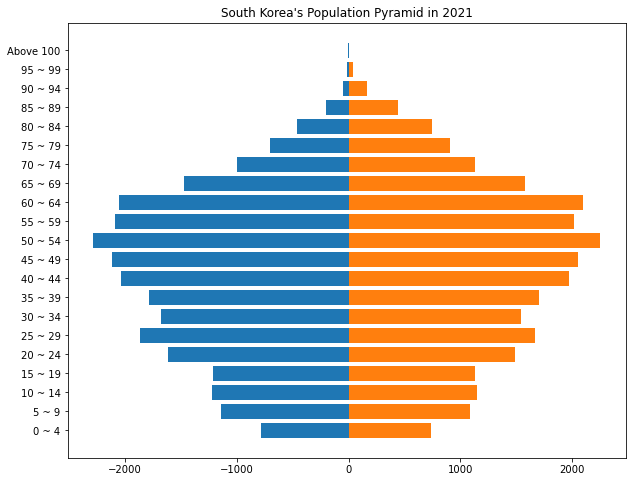

In [16]:
plt.figure(figsize=(10, 8))
plt.barh(df_male.columns, -df_male.iloc[0] // 1000)
plt.barh(df_female.columns, df_female.iloc[0] // 1000)
plt.title("South Korea's Population Pyramid in 2021")
plt.show()